# Creating retweet network

Social media is, by nature, networked data. Twitter networks manifest in multiple ways. One of the most important types of networks that appear in Twitter are retweet networks. We can represent these as directed graphs, with the retweeting user as the source and the retweeted person as the target. With Twitter data in our flattened DataFrame, we can import these into networkx and create a retweet network.

I will be using a dataset based on the 2018 State of the Union speech given by Donald Trump. 

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Import Data
sotu_retweets = pd.read_csv(r"C:\Users\Ricardo S. Biason\OneDrive\Ric\DataCamp\Marketing Analytics for Python\Analyzing Social Media Data in Python\State of the Union Retweet Networking dataset.csv")

In [15]:
sotu_retweets.head(n=5)

,contributors,coordinates,created_at,extended_entities,favorite_count,favorited,filter_level,geo,id,id_str,...,retweeted,retweeted_status-extended_tweet-full_text,retweeted_status-text,retweeted_status-user-screen_name,source,text,timestamp_ms,truncated,user-screen_name,withheld_in_countries
0,NaN,NaN,Wed Jan 31 03:51:59 +0000 2018,NaN,0,False,low,NaN,958548390052179968,958548390052179968,...,False,A PERFECT ANALOGY:\n\nSeveral democrats are br...,A PERFECT ANALOGY:\n\nSeveral democrats are br...,ScottPresler,"<a href=""http://twitter.com/download/iphone"" r...",RT @ScottPresler: A PERFECT ANALOGY:\n\nSevera...,1517370719813,False,MatthewJAld,NaN
1,NaN,NaN,Wed Jan 31 03:55:33 +0000 2018,NaN,0,False,low,NaN,958549287285215232,958549287285215232,...,False,NaN,President Trump invited families of Americans ...,RealJack,"<a href=""http://twitter.com/download/android"" ...",RT @RealJack: President Trump invited families...,1517370933730,False,broussard_sr,NaN
2,NaN,NaN,Wed Jan 31 03:09:22 +0000 2018,NaN,0,False,low,NaN,958537665334296577,958537665334296577,...,False,NaN,Don't you be fooled by any of his White Suprem...,UNITEDWEDREAM,"<a href=""http://twitter.com/download/iphone"" r...",RT @UNITEDWEDREAM: Don't you be fooled by any ...,1517368162841,False,CLSTEPHANY,NaN
3,NaN,NaN,Wed Jan 31 02:36:19 +0000 2018,NaN,0,False,low,NaN,958529347828305921,958529347828305921,...,False,NaN,Uh-oh. Our president mentioned the FIRST and S...,TomiLahren,"<a href=""http://twitter.com/download/iphone"" r...",RT @TomiLahren: Uh-oh. Our president mentioned...,1517366179793,False,DAWNSTUTESMAN,NaN
4,NaN,NaN,Wed Jan 31 02:46:24 +0000 2018,NaN,0,False,low,NaN,958531885424173057,958531885424173057,...,False,"Tonight isn't about memos, fake news, free thi...","Tonight isn't about memos, fake news, free thi...",TomiLahren,"<a href=""http://twitter.com/download/android"" ...","RT @TomiLahren: Tonight isn't about memos, fak...",1517366784803,False,SCischk,NaN


In [16]:
# Import networkx
import networkx as nx

# Create retweet network from edgelist
G_rt = nx.from_pandas_edgelist(
    sotu_retweets,
    source = 'user-screen_name', 
    target = 'retweeted_status-user-screen_name',
    create_using = nx.DiGraph())
    
# Print the number of nodes
print('Nodes in RT network:', len(G_rt.nodes()))

# Print the number of edges
print('Edges in RT network:', len(G_rt.edges()))

Nodes in RT network: 2287
Edges in RT network: 2340


# Creating reply network
Reply networks have a markedly different structure to retweet networks. While retweet networks often signal agreement, replies can signal discussion, deliberation, and disagreement. The network properties are the same, however: the network is directed, the source is the replier and the target is the user who is being replied to.

We are going to create a reply network from a slightly different sample of State of the Union tweets.

In [21]:
# Import Data
sotu_replies = pd.read_csv(r"C:\Users\Ricardo S. Biason\OneDrive\Ric\DataCamp\Marketing Analytics for Python\Analyzing Social Media Data in Python\State of the Union Reply Network dataset.csv")

In [36]:
sotu_replies.head(n=5)

,contributors,coordinates,created_at,display_text_range,extended_entities,extended_tweet,extended_tweet-full_text,favorite_count,favorited,filter_level,...,quoted_status_id,quoted_status_id_str,reply_count,retweet_count,retweeted,source,text,timestamp_ms,truncated,user-screen_name
0,NaN,NaN,Wed Jan 31 00:21:22 +0000 2018,"[34, 140]",NaN,{'full_text': '@LouDobbs @realDonaldTrump @POT...,@LouDobbs @realDonaldTrump @POTUS Discourage i...,0,False,low,...,9.577015e+17,9.577015e+17,0,0,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",@LouDobbs @realDonaldTrump @POTUS Discourage i...,1517358082783,True,ProfessorRobo
1,NaN,NaN,Wed Jan 31 02:42:15 +0000 2018,"[0, 14]",NaN,NaN,NaN,0,False,low,...,9.585300e+17,9.585300e+17,0,0,False,"<a href=""http://twitter.com/download/iphone"" r...",@ChristianMohn https://t.co/WUP9k7DHrm,1517366535591,False,BethMohn
2,NaN,NaN,Tue Jan 30 19:19:49 +0000 2018,"[17, 140]",NaN,{'full_text': '@LarrySchweikart People stay ho...,@LarrySchweikart People stay home to avoid #Fa...,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://twitter.com/download/android"" ...",@LarrySchweikart People stay home to avoid #Fa...,1517339989113,True,ASilNY
3,NaN,NaN,Tue Jan 30 23:46:17 +0000 2018,"[12, 35]",NaN,NaN,NaN,0,False,low,...,9.584821e+17,9.584821e+17,0,0,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",@WhiteHouse https://t.co/WgZvh2L6aT,1517355977521,False,mattg444
4,NaN,NaN,Tue Jan 30 22:21:52 +0000 2018,"[10, 60]",NaN,NaN,NaN,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://twitter.com/download/iphone"" r...",@aravosis I'm telling you he's practicing Tele...,1517350912194,False,hlthiskrieger


In [22]:

# Create reply network from edgelist
G_reply = nx.from_pandas_edgelist(
    sotu_replies,
    source = 'user-screen_name', 
    target = 'in_reply_to_screen_name',
    create_using = nx.DiGraph())
    
# Print the number of nodes
print('Nodes in reply network:', len(G_reply.nodes()))

# Print the number of edges
print('Edges in reply network:', len(G_reply.edges()))

Nodes in reply network: 2622
Edges in reply network: 1904


# Visualizing retweet network
Visualizing retweets networks is an important exploratory data analysis step because it allows us to visually inspect the structure of the network, understand if there is any user that has disproportionate influence, and if there are different spheres of conversation.




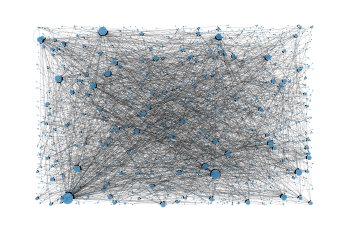

In [33]:
# Create random layout positions
pos = nx.random_layout(G_rt)

# Create size list
sizes = [x[1] for x in G_rt.degree()]

# Draw the network
nx.draw_networkx(G_rt, pos, 
    with_labels = False, 
    node_size = sizes,
    width = 0.1, alpha = 0.7,
    arrowsize = 2, linewidths = 0)

# Turn axis off and show
plt.axis('off'); plt.show()

Say we'd like to understand who the most important user in the network is, or find the group of most influential users, those who are the elites of communication. This is where the concept of centrality comes in. Centrality is a metric in social network analysis which attempts to find the most important node in a given network. There are many different ways to do this, but we're going to focus on two types: degree centrality and betweenness centrality.

# In-degree centrality
Centrality is a measure of importance of a node to a network. There are many different types of centrality and each of them has slightly different meaning in Twitter networks. We are first focusing on degree centrality, since its calculation is straightforward and has an intuitive explanation.

For directed networks like Twitter, we need to be careful to distinguish between in-degree and out-degree centrality, especially in retweet networks. In-degree centrality for retweet networks signals users who are getting many retweets.

In [37]:
column_names = ['screen_name', 'degree_centrality']

In [38]:
# Generate in-degree centrality for retweets 
rt_centrality = nx.in_degree_centrality(G_rt)

# Generate in-degree centrality for replies 
reply_centrality = nx.in_degree_centrality(G_reply)

# Store centralities in DataFrame
rt = pd.DataFrame(list(rt_centrality.items()), columns = column_names)
reply = pd.DataFrame(list(reply_centrality.items()), columns = column_names)

# Print first five results in descending order of centrality
print(rt.sort_values('degree_centrality', ascending = False).head())

# Print first five results in descending order of centrality
print(reply.sort_values('degree_centrality', ascending = False).head())

      screen_name  degree_centrality
84        FoxNews           0.055993
38     WhiteHouse           0.031059
1    ScottPresler           0.029746
7      TomiLahren           0.019685
175      HouseGOP           0.017060
         screen_name  degree_centrality
51   realDonaldTrump           0.057230
53             POTUS           0.019458
22           FoxNews           0.013735
6         WhiteHouse           0.011064
416           FLOTUS           0.010301


# Betweenness centrality

Betweenness centrality measures how many shortest paths between pairs of nodes need to pass through any given node. Think of an airport. It doesn't have to have many inbound planes to be important, but if it connects cities from many parts of the world to each other, it would have high betweenness centrality.

Betweenness centrality for retweet and reply networks signals users who bridge between different Twitter communities. These communities may be tied together by topic or ideology.

In [40]:
column_names = ['screen_name', 'betweenness_centrality']

In [41]:
# Generate betweenness centrality for retweets 
rt_centrality = nx.betweenness_centrality(G_rt)

# Generate betweenness centrality for replies 
reply_centrality = nx.betweenness_centrality(G_reply)

# Store centralities in data frames
rt = pd.DataFrame(list(rt_centrality.items()), columns = column_names)
reply = pd.DataFrame(list(reply_centrality.items()), columns = column_names)

# Print first five results in descending order of centrality
print(rt.sort_values('betweenness_centrality', ascending = False).head())

# Print first five results in descending order of centrality
print(reply.sort_values('betweenness_centrality', ascending = False).head())

        screen_name  betweenness_centrality
84          FoxNews                0.000026
29   Public_Citizen                0.000009
206     ChristiChat                0.000005
119      guypbenson                0.000005
362    johncardillo                0.000004
          screen_name  betweenness_centrality
288      ScottPresler            1.019365e-06
319   HRCNJVolunteers            2.912471e-07
1109             RRN3            2.912471e-07
1697    thebestcloser            2.912471e-07
1844   BrandonTXNeely            1.456236e-07


# Ratios
While not strictly a measure of importance to a network, the idea of being "ratio'd" is a network measure which is particular to Twitter and is typically used to judge the unpopularity of a tweet. "The Ratio," as it is called, is calculated by taking the number of replies and dividing it by the number of retweets. For our purposes, it makes conceptual sense to take only the in-degrees of both the retweet and reply networks.

In [42]:
column_names = ['screen_name', 'degree']

In [43]:
# Calculate in-degrees and store in DataFrame
degree_rt = pd.DataFrame(list(G_rt.in_degree()), columns = column_names)
degree_reply = pd.DataFrame(list(G_reply.in_degree()), columns = column_names)

# Merge the two DataFrames on screen name
ratio = degree_rt.merge(degree_reply, on = 'screen_name', suffixes = ('_rt', '_reply'))

# Calculate the ratio
ratio['ratio'] = ratio['degree_reply'] / ratio['degree_rt']

# Exclude any tweets with less than 5 retweets
ratio = ratio[ratio['degree_rt'] >= 5]

# Print out first five with highest ratio
print(ratio.sort_values('ratio', ascending = False).head())

       screen_name  degree_rt  degree_reply  ratio
46     SpeakerRyan          8            15  1.875
53         NBCNews         20            18  0.900
43      benshapiro          5             4  0.800
42       SenateGOP          5             3  0.600
85  CBSThisMorning          6             3  0.500
